In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

In [3]:
dt = pd.read_csv('properties-cleaned-v2.csv')

In [4]:
dt.sample(4)

,society,price,sector,pricePerSqft,propertyType,area,superbuilt,carpet,builtup,bedRooms,bathRooms,address,floorNum,facing,agePossesion,balcony,pooja room,servant room,study room,others,store room,furnishType,luxuryScore
1707,m3m heights,3.40,sector 65,18599.56,flat,1828.0,1828.0,1188.20,1462.40,3.0,3.0,"M3M Heights Sector 65, Gurgaon",30.0,na,new property,NaN,0,0,0,0,0,0,39
712,"sector 45, gurgaon",16.40,sector 45,324752.48,house,505.0,656.5,429.25,505.00,6.0,9.0,"sector 45, gurgaon",4.0,south-west,relatively new property,3+,1,1,0,0,1,0,164
62,"eros rosewood city, sector 49, gurgaon",4.50,sector 49,264705.88,house,170.0,221.0,144.50,170.00,5.0,4.0,"eros rosewood city, sector 49, gurgaon",2.0,north-east,old property,3,0,1,0,0,0,1,153
1423,paras dews,1.45,sector 106,10469.31,flat,1385.0,1385.0,831.00,1038.75,2.0,2.0,"Paras Dews Sector 106, Gurgaon",5.0,east,relatively new property,NaN,0,0,0,0,0,2,91


In [5]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3687 entries, 0 to 3686
Data columns (total 23 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   society       3687 non-null   object 
 1   price         3687 non-null   float64
 2   sector        3687 non-null   object 
 3   pricePerSqft  3330 non-null   float64
 4   propertyType  3687 non-null   object 
 5   area          3330 non-null   float64
 6   superbuilt    3330 non-null   float64
 7   carpet        3330 non-null   float64
 8   builtup       3330 non-null   float64
 9   bedRooms      3687 non-null   float64
 10  bathRooms     3687 non-null   float64
 11  address       3687 non-null   object 
 12  floorNum      3675 non-null   float64
 13  facing        3687 non-null   object 
 14  agePossesion  3687 non-null   object 
 15  balcony       1567 non-null   object 
 16  pooja room    3687 non-null   int64  
 17  servant room  3687 non-null   int64  
 18  study room    3687 non-null 

In [6]:
dt.shape

(3687, 23)

In [7]:
dt.duplicated().sum()

7

In [8]:
dt = dt[~dt.duplicated()] # dropped duplicated rows 

# Univariate

# property type

<Axes: xlabel='propertyType'>

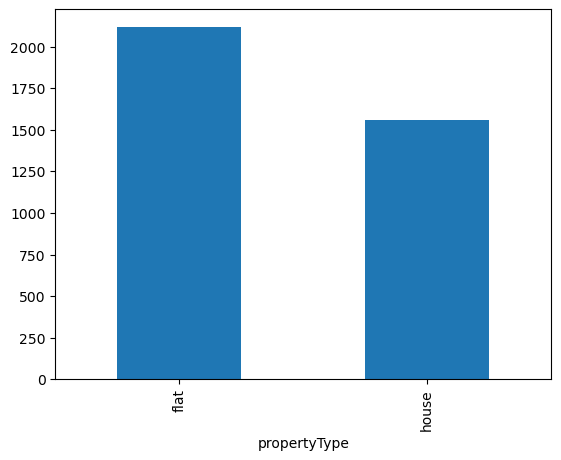

In [11]:
dt['propertyType'].value_counts().plot(kind = 'bar')

    - flats are more than houses , flats 58% approx and houses 42% 
    - no missing values 

# society

In [14]:
dt['society'].value_counts().shape

(667,)

In [15]:
dt['society'].value_counts()

society
m3m heights                                                             63
m3m woodshire                                                           57
adani m2k oyster grande                                                 54
sobha city                                                              50
shapoorji pallonji joyville gurugram                                    46
paras dews                                                              42
tata primanti                                                           41
dlf the ultima                                                          41
m3m golfestate                                                          38
sector 46, gurgaon                                                      38
experion wdchants                                                       37
ireo skyon                                                              36
vipul tatvam villa, sector 48, gurgaon                                  35
ireo the corridor

<Axes: xlabel='society'>

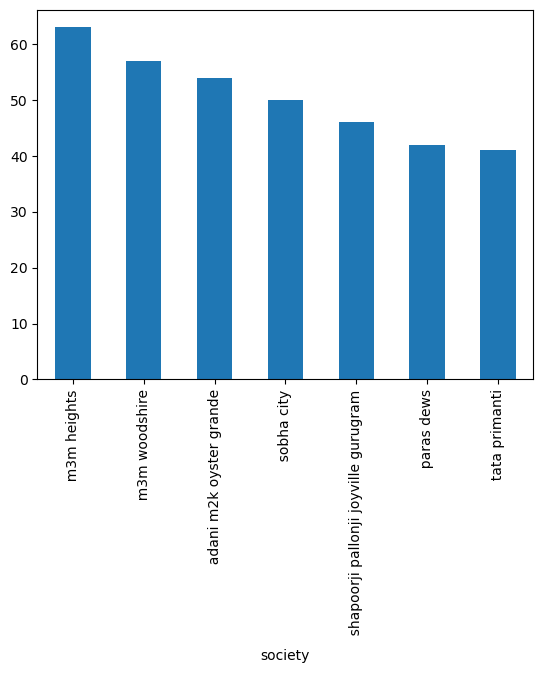

In [16]:
dt['society'].value_counts().head(7).plot(kind = 'bar')

In [17]:
dt['society'].isnull().sum()

0

    - no null values 
    - there are 667 types of societies in our database 
    - m3m heights and m3m woodshire and adani m2k are top 3 societies in terms number of flats or houses

# sector 

In [20]:
dt['sector'].value_counts().shape

(128,)

<Axes: xlabel='sector'>

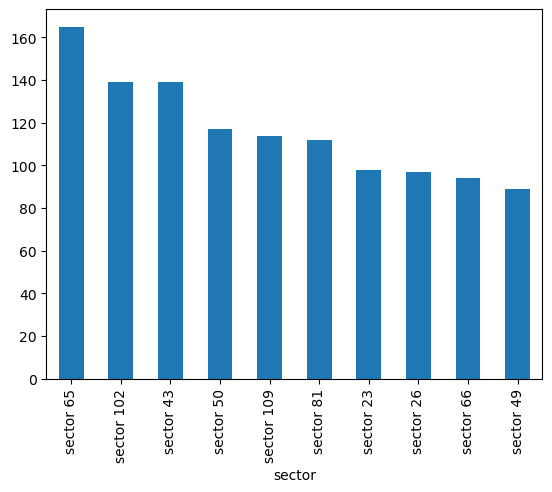

In [21]:
dt['sector'].value_counts().head(10).plot(kind = 'bar')

In [22]:
freq = dt['sector'].value_counts()

In [23]:
sectorFrequency = {
    "very high (>100)": (freq>100).sum(),
    "high (50-100)": ((freq>=50)&(freq<=100)).sum(),
    "moderate(10-50)": ((freq>=10)&(freq<50)).sum(),
    "low(1-10)":((freq>1)&(freq<10)).sum(),
    "very low(1)":(freq == 1).sum()
}

In [24]:
sectorFrequency

{'very high (>100)': 6,
 'high (50-100)': 23,
 'moderate(10-50)': 45,
 'low(1-10)': 28,
 'very low(1)': 26}

    - there are 128 sectors 
    - no null values 
    - frequency  
        very high (>100) - 6 sectors
        high (50-100) -  23 sectors
        moderate(10-50) -  45 sectors
        low(1-10) -  28 sectors
        very low(1) -  26 sectors
    - top 3 sectors for most number of properties are 65 , 102 and 43

# price

In [27]:
dt['price'].isnull().sum()

0

In [28]:
dt['price'].describe()

count    3680.000000
mean        5.712133
std         5.271561
min         0.280000
25%         2.370000
50%         3.750000
75%         7.492500
max        75.000000
Name: price, dtype: float64

<Axes: xlabel='price', ylabel='Count'>

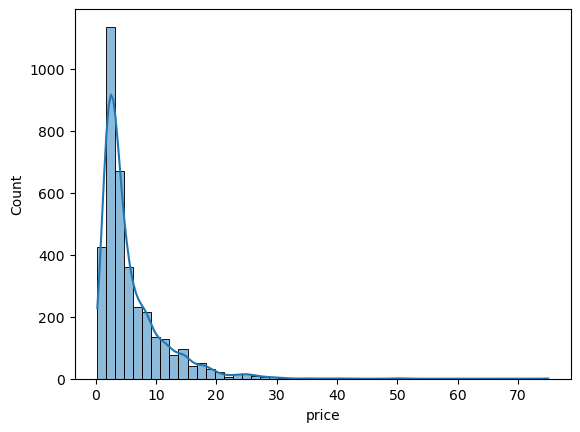

In [29]:
sns.histplot(dt['price'],kde = True , bins = 50)

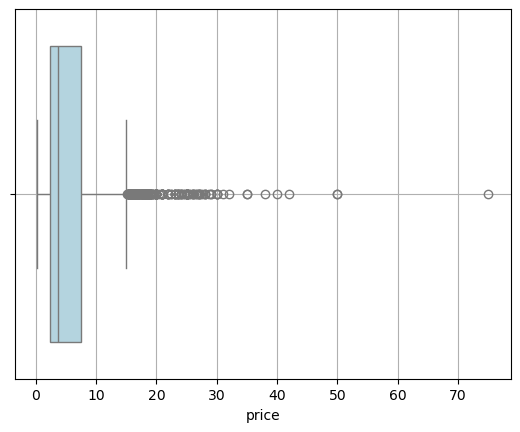

In [30]:
sns.boxplot(dt['price'],color = 'lightblue', orient = 'h')
plt.grid()

In [31]:
dt['price'].std()

5.271560678350146


    - no null values 
    - some outliers 75 , 50 and 40+
    - range from - 70 lac to 75cr
    - median - 3.7 and mean - 5.7
    - distribution is leftskewed , which is normal as there will more flats for less price 
    - standard deviation is 5.27 , which shows high variabilty 
    - IQR is 2.3 and 7.4

In [33]:
dt['price'].skew() , dt['price'].kurt()

(2.774594770532756, 15.122100630467504)

    - skewness is 2.77 which is positively skewed , which tell the distribution tail is ,
      skewed to right which is visible in histogram also 
    - kurtosis is 15.12 , a kurtosis of more than 3 tell the heavier tails and the peak is sharp , 
      and there are more outliers as compared to normal distrubution 

In [35]:
quantiles = dt['price'].quantile([0.1,0.25,0.50,0.75,0.95,0.99])
quantiles

0.10     1.7000
0.25     2.3700
0.50     3.7500
0.75     7.4925
0.95    16.2500
0.99    25.0000
Name: price, dtype: float64

    - 1% properties are below 1.7cr
    - 25% properties are below 2.7cr
    - 50% properties are below 3.7cr
    - 75% properties are below 7.4cr
    - 95% properties are below 16cr
    - 99% properties are below 25cr

In [37]:
q1,q3 = dt['price'].quantile(0.25) , dt['price'].quantile(0.75)

In [38]:
iqr = q3 - q1

In [39]:
lB = iqr - 1.5*q1
uB = iqr + 1.5*q3

In [40]:
outliers = dt[ (dt['price'] < lB) | (dt['price'] > uB) ]

In [41]:
outliers.shape

(475, 23)

In [42]:
outliers['price'].describe()

count    475.000000
mean       9.077516
std       10.940884
min        0.280000
25%        1.280000
50%        1.480000
75%       18.500000
max       75.000000
Name: price, dtype: float64


    - there are are 475 outliers 
    - the mean of outliers is 9 
    - range is 0.28 to 75 

    ECDF(emperical cumulative distribution plot) gives you:
    	•	Percentile view: how much of your data lies below or equal to a certain value.
    	•	It’s a step-by-step accumulation of proportions across the sorted data.
    	•	Unlike a histogram, it doesn’t bin — so it preserves each data point.
        

<Axes: xlabel='price', ylabel='Proportion'>

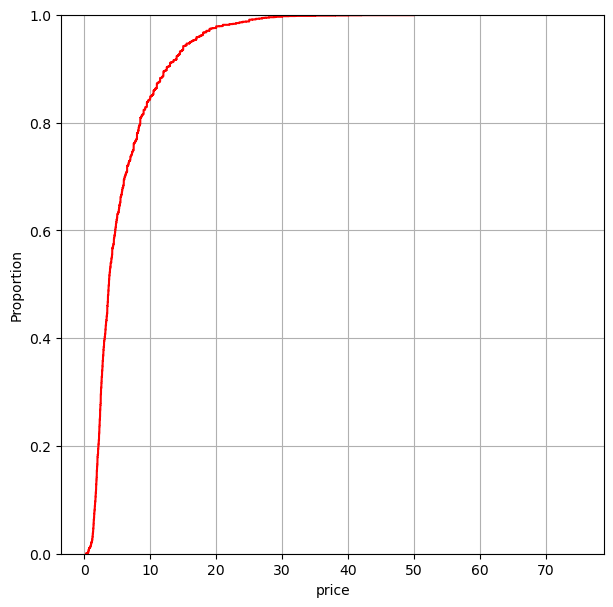

In [45]:
plt.figure(figsize = (7,7))
plt.grid()
sns.ecdfplot(x = dt['price'] , data = dt , color = 'red' )

<Axes: title={'center': 'AFTER log(1+x)'}, xlabel='price', ylabel='Count'>

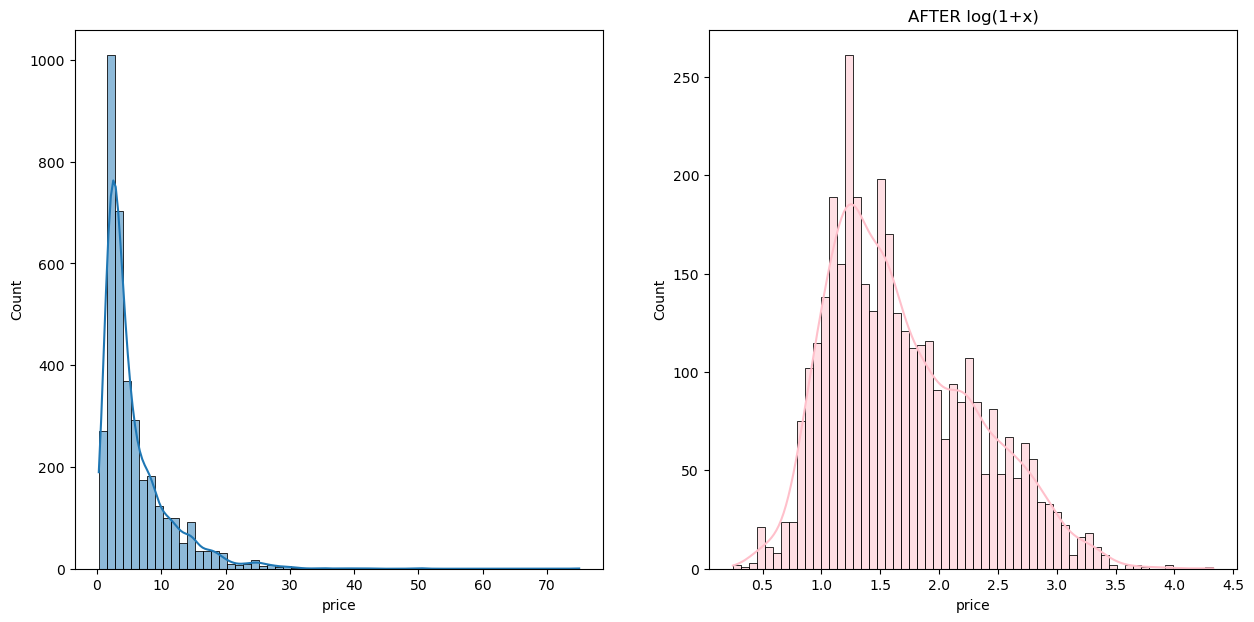

In [46]:
# normal distribution
plt.figure(figsize = (15,7))
plt.subplot(1,2,1)
sns.histplot(dt['price'] , kde = True ,bins = 60)

# as it is skewed we can apply log transformation 

# we are calculating log(1+x) just in case we have 0 or neg values 
plt.subplot(1,2,2)
plt.title('AFTER log(1+x)')
sns.histplot(np.log1p(dt['price']), kde = True , color = 'pink' , bins = 60)

<Axes: title={'center': "log(1+ dt['price']"}, xlabel='price'>

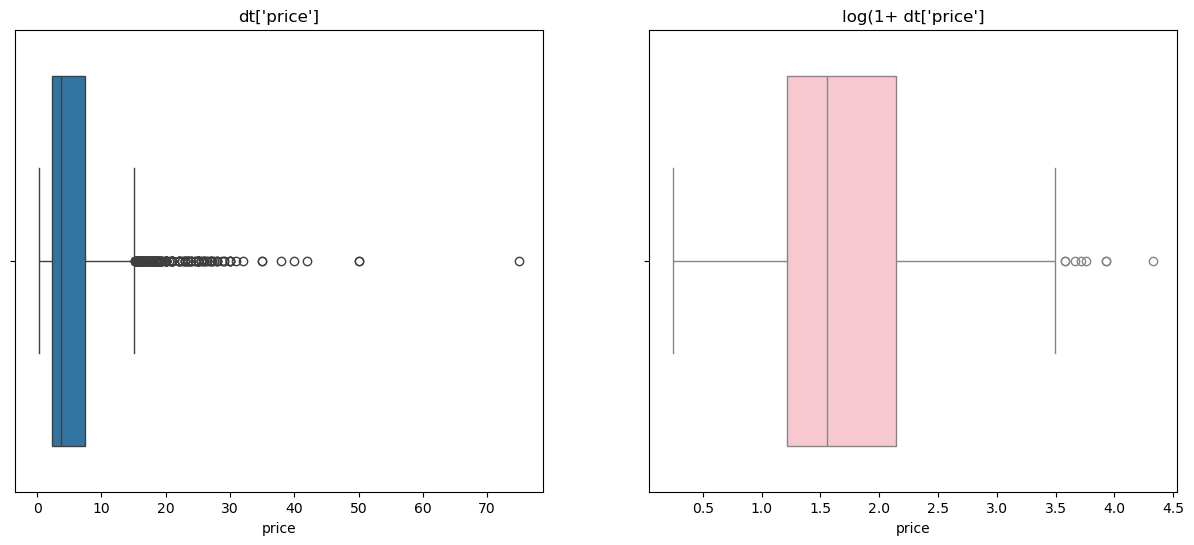

In [47]:
plt.figure(figsize = (15,6))
plt.subplot(1,2,1)
plt.title('dt[\'price\']')
sns.boxplot(dt['price'] , orient = 'h' )

plt.subplot(1,2,2)
plt.title('log(1+ dt[\'price\']')
sns.boxplot(np.log1p(dt['price']) , orient = 'h' , color = 'pink')

# price per square feet

In [49]:
dt['pricePerSqft'].isnull().sum()

351

     there are 351 null values

In [51]:
dt['pricePerSqft'].describe()

count    3.329000e+03
mean     1.375306e+05
std      4.474941e+05
min      4.074070e+03
25%      1.222222e+04
50%      1.845707e+04
75%      2.500000e+05
max      9.166667e+06
Name: pricePerSqft, dtype: float64

In [52]:
dt['pricePerSqft'].describe().apply(lambda x: f'{x:.2f}')

count       3329.00
mean      137530.59
std       447494.08
min         4074.07
25%        12222.22
50%        18457.07
75%       250000.00
max      9166666.67
Name: pricePerSqft, dtype: object

    - the mean is astronomically high , this cant be possible , this is due to the outliers in our data
    - the median is okaish but still too high 18k , 
    - and the max is 9166k which is a outlier for sure 

<Axes: xlabel='pricePerSqft', ylabel='Count'>

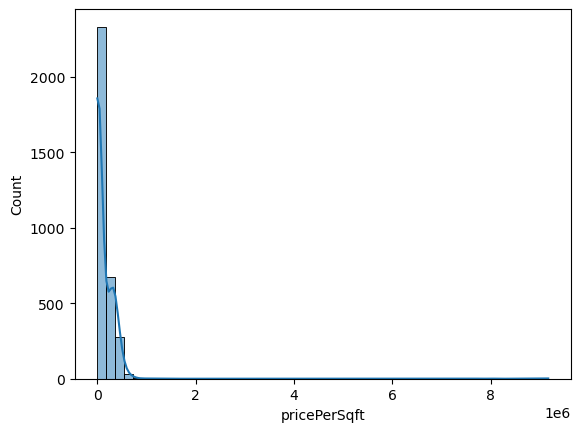

In [54]:
sns.histplot(dt['pricePerSqft'], bins = 50 , kde = True) 

    - most properties around 2250 are between 0 and .25e+06 i.e 2,50,000 , our data is fucked up due to            ouliers

<Axes: xlabel='pricePerSqft'>

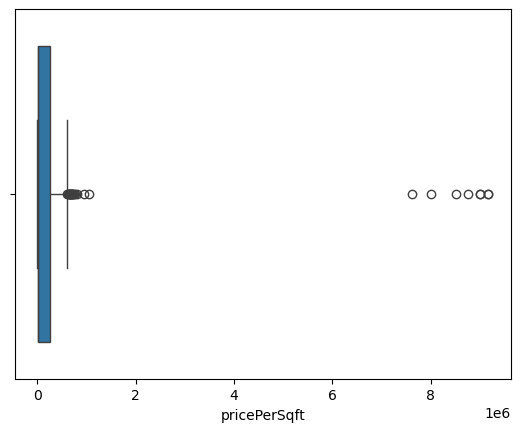

In [56]:
sns.boxplot(dt['pricePerSqft']  , orient = 'h')

    - there are some extremely huge outliers which we need to remove , on the rright side of whiskers 

# bedrooms

In [59]:
dt['bedRooms'].isnull().sum()

0

In [60]:
dt['bedRooms'].describe()

count    3680.000000
mean        4.237228
std         2.867458
min         1.000000
25%         3.000000
50%         3.000000
75%         5.000000
max        49.000000
Name: bedRooms, dtype: float64

<Axes: xlabel='bedRooms'>

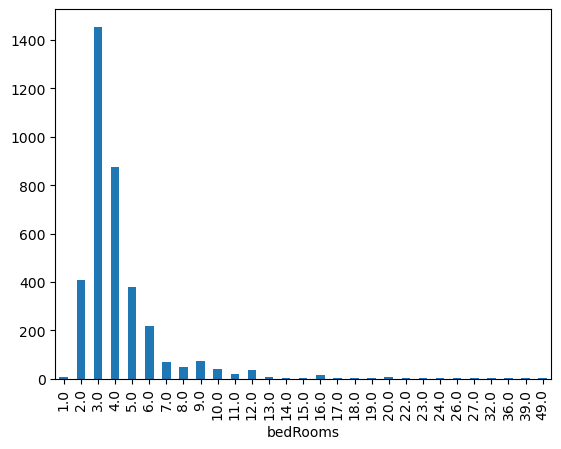

In [61]:
dt['bedRooms'].value_counts().sort_index().plot(kind = 'bar')

    - outliers a house or a flat cannot have 30 or plus bedrooms , this will affect our prediction model

<Axes: ylabel='count'>

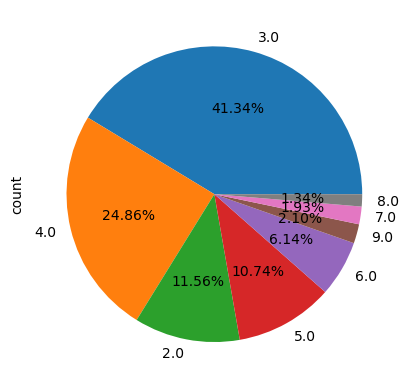

In [63]:
dt['bedRooms'].value_counts().head(8).plot(kind = 'pie' , autopct = '%0.2f%%')

# bathrooms

In [65]:
dt['bathRooms'].isnull().sum()

0

<Axes: xlabel='bathRooms'>

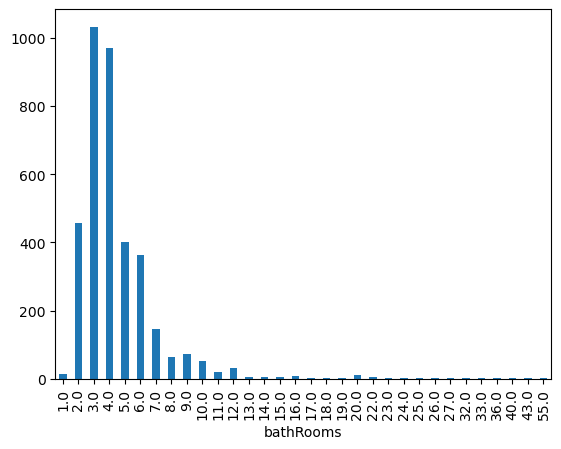

In [66]:
dt['bathRooms'].value_counts().sort_index().plot(kind = 'bar')

    - outliers a house or a flat cannot have 30 or plus bathrooms , this will affect our prediction model

<Axes: ylabel='count'>

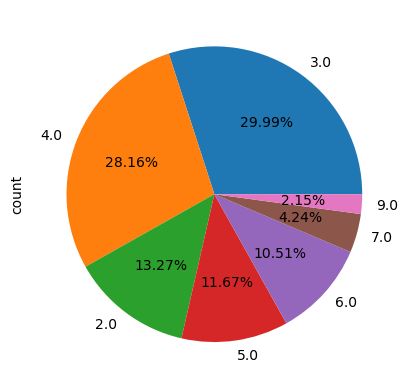

In [68]:
dt['bathRooms'].value_counts().head(7).plot(kind = 'pie' , autopct = '%0.2f%%')

# balcony

In [70]:
dt['balcony'].isnull().sum()

2119

    2119 null values , which is almost 60%
    

<Axes: xlabel='balcony'>

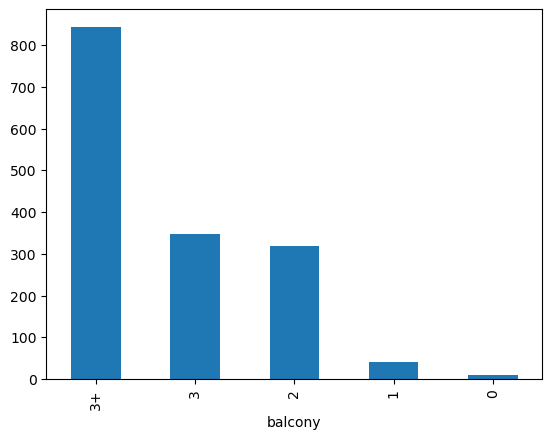

In [72]:
dt['balcony'].value_counts().plot(kind = 'bar')

<Axes: ylabel='count'>

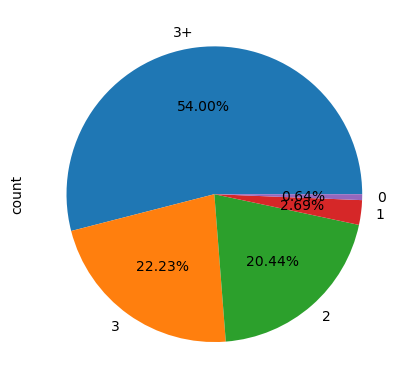

In [73]:
dt['balcony'].value_counts().plot(kind = 'pie' , autopct = '%0.2f%%')

In [74]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3680 entries, 0 to 3686
Data columns (total 23 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   society       3680 non-null   object 
 1   price         3680 non-null   float64
 2   sector        3680 non-null   object 
 3   pricePerSqft  3329 non-null   float64
 4   propertyType  3680 non-null   object 
 5   area          3329 non-null   float64
 6   superbuilt    3329 non-null   float64
 7   carpet        3329 non-null   float64
 8   builtup       3329 non-null   float64
 9   bedRooms      3680 non-null   float64
 10  bathRooms     3680 non-null   float64
 11  address       3680 non-null   object 
 12  floorNum      3668 non-null   float64
 13  facing        3680 non-null   object 
 14  agePossesion  3680 non-null   object 
 15  balcony       1561 non-null   object 
 16  pooja room    3680 non-null   int64  
 17  servant room  3680 non-null   int64  
 18  study room    3680 non-null   int

# floornum

In [76]:
dt['floorNum'].isnull().sum()

12

<Axes: xlabel='floorNum'>

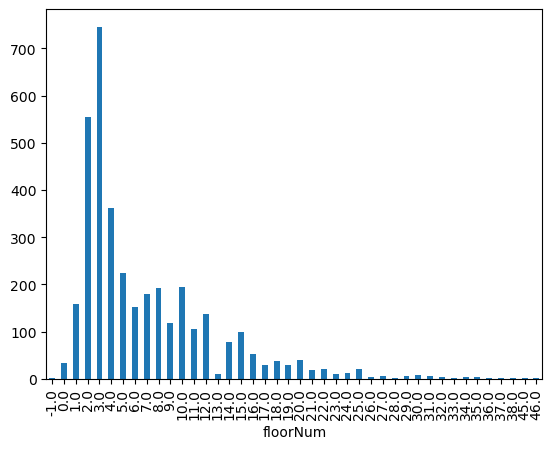

In [77]:
dt['floorNum'].value_counts().sort_index().plot(kind = 'bar')

In [78]:
dt['floorNum'].describe()

count    3668.000000
mean        6.836423
std         5.911350
min        -1.000000
25%         3.000000
50%         4.000000
75%        10.000000
max        46.000000
Name: floorNum, dtype: float64

In [79]:
dt[dt['floorNum'] == -1] # maybee its in basement 

,society,price,sector,pricePerSqft,propertyType,area,superbuilt,carpet,builtup,bedRooms,bathRooms,address,floorNum,facing,agePossesion,balcony,pooja room,servant room,study room,others,store room,furnishType,luxuryScore
383,puri diplomatic greens,3.95,sector 111,NaN,flat,NaN,NaN,NaN,NaN,3.0,4.0,"Puri Diplomatic Greens Sector 111, Gurgaon",-1.0,south-west,old property,NaN,1,1,0,0,1,2,88


<Axes: xlabel='floorNum'>

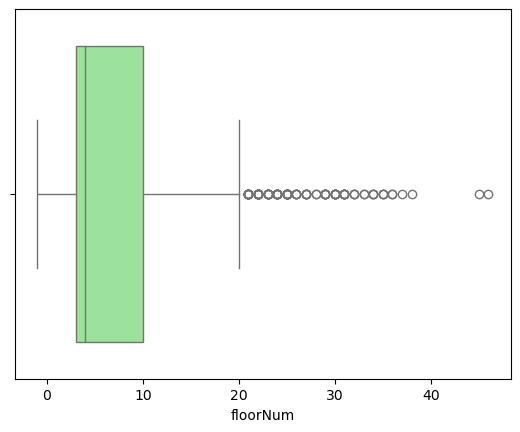

In [80]:
sns.boxplot(dt['floorNum'] , orient = 'h' , color = 'lightgreen')


    - most properties are around 1 to 5 floors , 3 being the most common 
    - the IQR range is around 3 to 11
    - there are some potential outliers too 

# facing

In [83]:
dt['facing'].isnull().sum()

0

<Axes: xlabel='facing'>

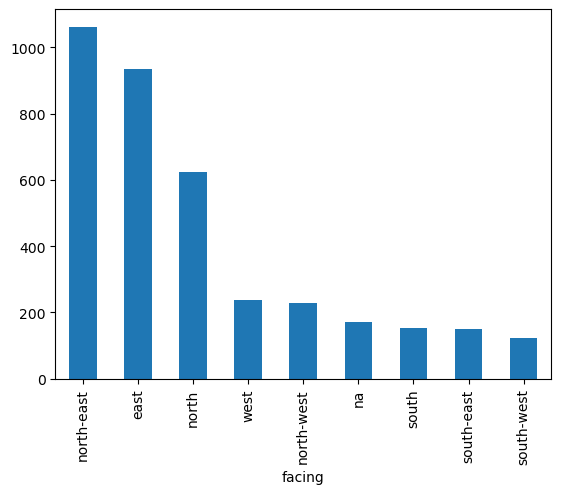

In [84]:
dt['facing'].value_counts().plot(kind = 'bar')

    - most properties are in east and north-east which is understandable as it is the side in which sun rises

# agePossesion

In [87]:
dt['agePossesion'].isnull().sum()

0

In [88]:
dt['agePossesion'].value_counts()

agePossesion
relatively new property    1930
moderatly old property      810
new property                580
old property                339
under construction           21
Name: count, dtype: int64

<Axes: ylabel='count'>

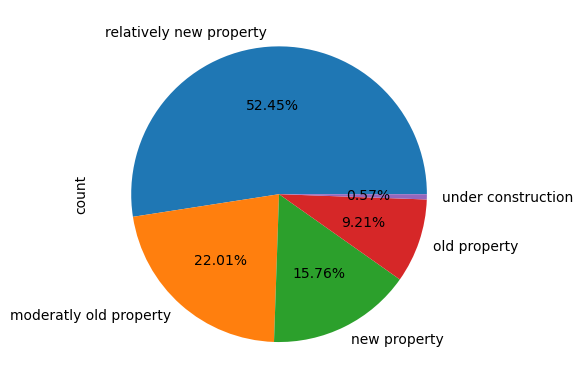

In [89]:
dt['agePossesion'].value_counts().plot(kind = 'pie' , autopct = '%0.2f%%')

# areas

In [91]:
dt.head(1)

,society,price,sector,pricePerSqft,propertyType,area,superbuilt,carpet,builtup,bedRooms,bathRooms,address,floorNum,facing,agePossesion,balcony,pooja room,servant room,study room,others,store room,furnishType,luxuryScore
0,"palam vihar, gurgaon",4.26,sector 1,24027.07,house,1773.0,2304.9,1507.05,1773.0,6.0,6.0,"palam vihar, gurgaon",3.0,north,relatively new property,3,0,0,0,0,0,1,58


In [92]:
dt['builtup'].isnull().sum()

351

In [93]:
dt['builtup'].describe()

count     3329.000000
mean      1411.494527
std       1250.961366
min          3.000000
25%        360.000000
50%       1388.000000
75%       1874.400000
max      20000.000000
Name: builtup, dtype: float64

    - 3 is not possible so , it is a outlier 

In [95]:
dt['builtup'].value_counts().sort_index().head(100)

builtup
3.00       2
4.00       3
6.00       1
8.00       1
10.00      1
55.00      2
60.00     52
61.00      2
62.00      1
65.00      1
66.00      6
70.00      3
72.00      5
75.00      2
78.00      1
80.00      3
81.00      1
83.70      1
84.00      1
85.00      1
98.00      1
100.00    56
101.00     6
102.00     1
105.00     1
106.00     2
106.50     1
109.00     4
110.00     1
117.00     1
117.60     1
120.00     7
125.00     2
130.00     1
144.50     1
148.00     1
150.00    11
158.00     1
160.00    17
161.00    29
161.46     8
162.00     4
163.00     4
164.00     2
165.00     2
166.00     1
166.66     1
167.00     2
169.00     1
170.00     2
171.00     2
172.00     5
173.00    22
175.00     4
178.50     1
179.00     2
180.00     9
181.00     6
183.00     2
184.00     1
185.00     1
190.00     3
192.00     5
196.00     1
198.00     1
200.00    25
202.00     1
204.00    14
204.15     1
204.50     1
204.51     3
204.56     1
205.00     3
208.80     1
210.00     2
213.00     1
215.

In [96]:
# anything below 420 sqft is not liveable , so we will drop those values and 
# figure out some missining value imputation there , because we 
# cannot drop the whole records as there are too many of those 

In [97]:
cols = ['builtup','carpet','superbuilt','area']

for val in cols:
    dt[val] = dt[val].mask(dt[val]<=420,np.nan)

    - mask() function is used to replace the value when the condition is met 
    
    - mask( condition , new value )

In [99]:
dt['builtup'].isnull().sum()

1253

In [100]:
dt['builtup'].describe()

count     2427.000000
mean      1850.016407
std       1197.049441
min        429.000000
25%       1244.000000
50%       1560.000000
75%       2078.750000
max      20000.000000
Name: builtup, dtype: float64

<Axes: xlabel='builtup', ylabel='Count'>

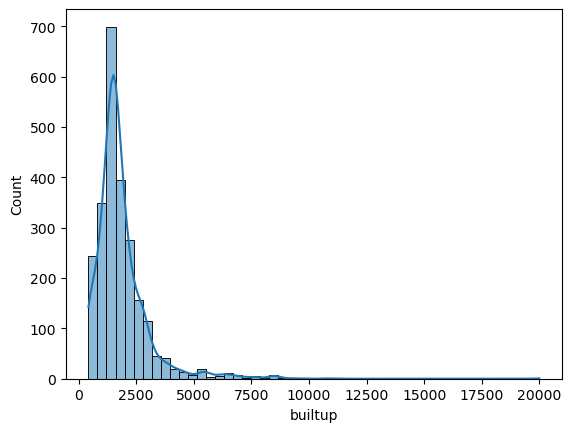

In [101]:
sns.histplot(dt['builtup'],kde = True , bins = 50)

<Axes: xlabel='builtup'>

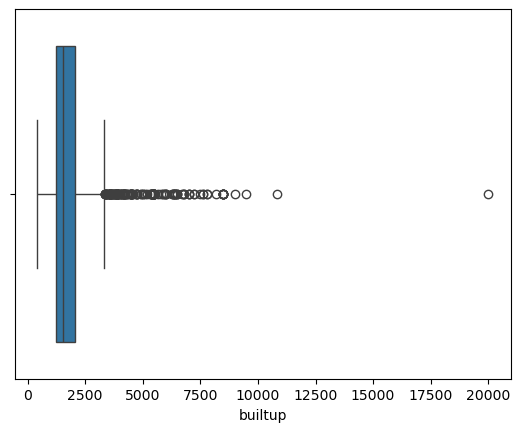

In [102]:
sns.boxplot(dt['builtup'] , orient = 'h')

     - 1253 null values
     - the data is right skewed 
     - there are oulier 
     - most of properties lie between 1250 to 2500 sqft IQR range 


In [104]:
dt['carpet'].isnull().sum()

1277

In [105]:
dt['carpet'].describe()

count     2403.000000
mean      1531.719470
std       1010.595428
min        425.000000
25%       1025.700000
50%       1288.950000
75%       1713.600000
max      17000.000000
Name: carpet, dtype: float64

<Axes: xlabel='carpet', ylabel='Count'>

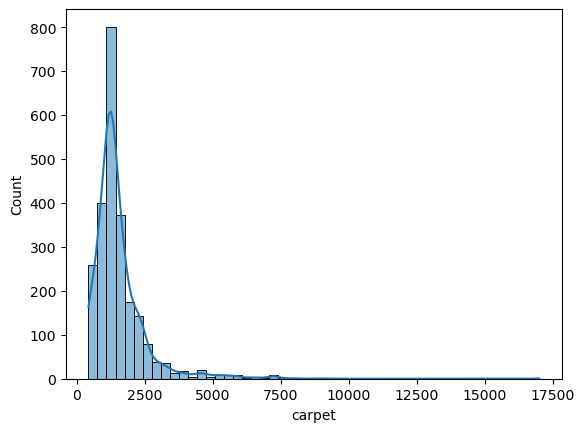

In [106]:
sns.histplot(dt['carpet'],kde = True , bins = 50)

<Axes: xlabel='carpet'>

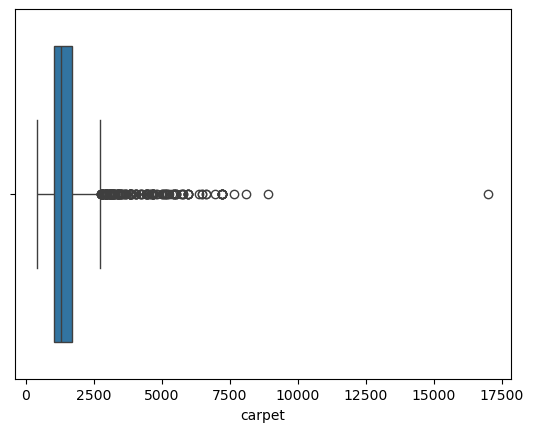

In [107]:
sns.boxplot(dt['carpet'] , orient = 'h')

     - 1277 null values
     - the data is right skewed 
     - there are oulier 
     - most of properties lie between 1250 to 2500 sqft IQR range 


In [109]:
dt['area'].isnull().sum()

1253

In [110]:
dt['area'].describe()

count     2427.000000
mean      2181.235550
std       1253.517435
min        429.000000
25%       1550.000000
50%       1950.000000
75%       2560.000000
max      20000.000000
Name: area, dtype: float64

<Axes: xlabel='area', ylabel='Count'>

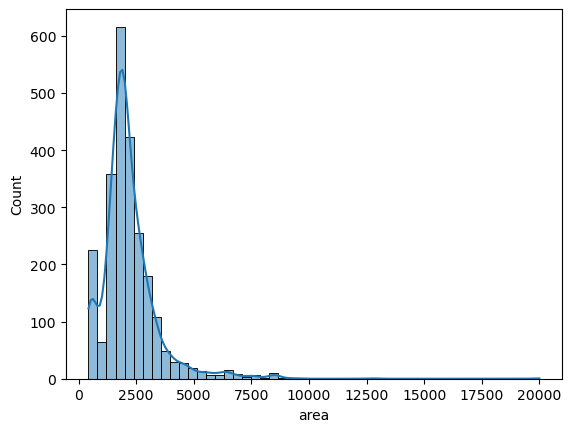

In [111]:
sns.histplot(dt['area'],kde = True , bins = 50)

<Axes: xlabel='area'>

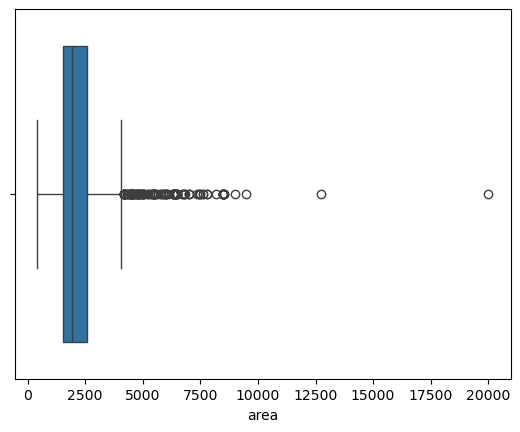

In [112]:
sns.boxplot(dt['area'] , orient = 'h')

# additonalRooms

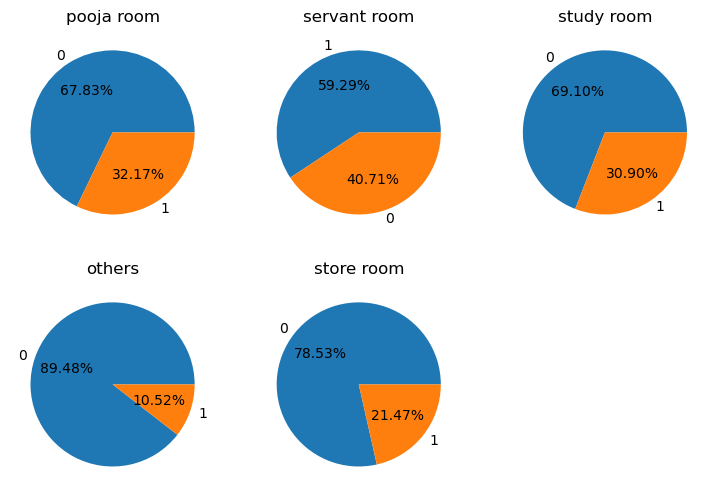

In [114]:
plt.figure(figsize = (9,6))
for index , name in enumerate(['pooja room','servant room','study room','others','store room'],1):
    axis = plt.subplot(2,3,index)
    dt[name].value_counts().plot(kind = 'pie' , autopct = '%0.2f%%' )
    plt.title(name)
    plt.ylabel('')

# furnishingType

    0 - fully furnished
    1 - semi furnished
    2 - no furnishing

In [117]:
dt['furnishType'].value_counts()

furnishType
1    1822
2    1480
0     378
Name: count, dtype: int64

<Axes: ylabel='count'>

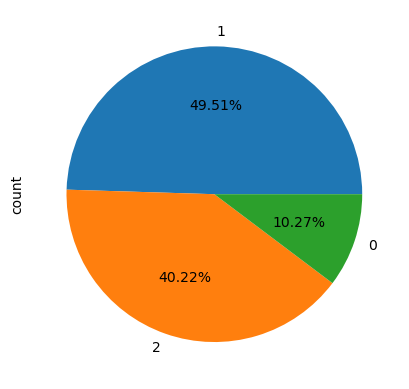

In [118]:
dt['furnishType'].value_counts().plot(kind = 'pie', autopct = '%0.2f%%')

# luxury score 

In [120]:
dt['luxuryScore'].describe()

count    3680.000000
mean      130.810054
std        61.803836
min         0.000000
25%        81.000000
50%       127.000000
75%       190.000000
max       221.000000
Name: luxuryScore, dtype: float64

<Axes: xlabel='luxuryScore', ylabel='Count'>

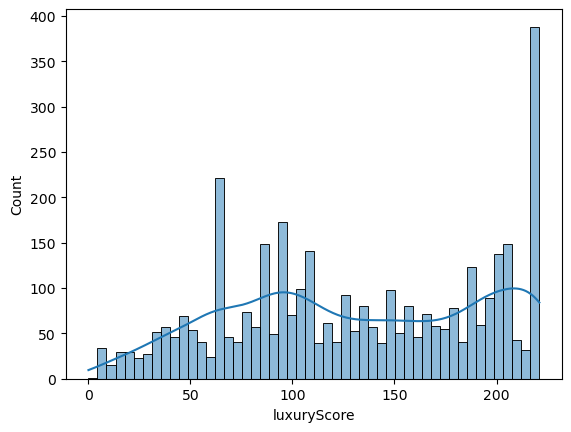

In [121]:
sns.histplot(dt['luxuryScore'] , bins = 50 , kde = True)

<Axes: xlabel='luxuryScore'>

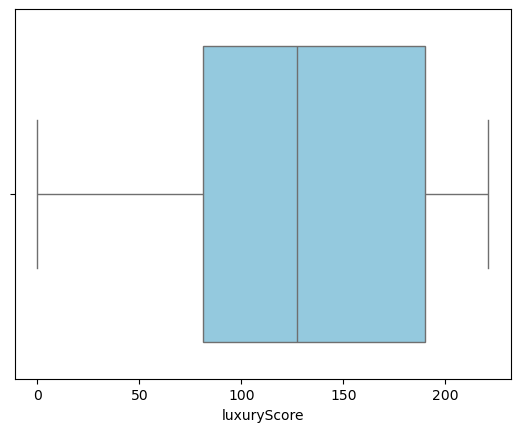

In [122]:
sns.boxplot(dt['luxuryScore'],orient = 'h',color='skyblue')

    - most properties lie between 50 to 175 luxury score 
    - there are sveral peaks , around 50 then at very end 212 , indicating a lot of luxury flats 
    - no outliers 
    

In [124]:
dt.to_csv('properties-cleaned-v3.csv',index = False)